In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data importing

In [122]:
df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Eda

In [123]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [124]:
df.shape

(1338, 7)

In [125]:
cols=["bmi"]
for i in df.columns[1:-1]:
    if i not in cols:
      print(df[i].value_counts())
      print("")
      print("****************************")
      print("")

sex
male      676
female    662
Name: count, dtype: int64

****************************

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

****************************

smoker
no     1064
yes     274
Name: count, dtype: int64

****************************

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

****************************



In [126]:
df[df["children"]>4]     

,age,sex,bmi,children,smoker,region,charges
32,19,female,28.600,5,no,southwest,4687.79700
71,31,male,28.500,5,no,northeast,6799.45800
166,20,female,37.000,5,no,southwest,4830.63000
413,25,male,23.900,5,no,southwest,5080.09600
425,45,male,24.310,5,no,southeast,9788.86590
438,52,female,46.750,5,no,southeast,12592.53450
568,49,female,31.900,5,no,southwest,11552.90400
640,33,male,42.400,5,no,southwest,6666.24300
877,33,male,33.440,5,no,southeast,6653.78860
932,46,male,25.800,5,no,southwest,10096.97000


In [127]:
df.info()    #No null values are present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [128]:
df.describe()
#with below data we can understand that 75% people in our data are having age less than 51,bmi less than 34,children less than or qual to 2,a nd charges below 16k


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [129]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [130]:
#This is manual encoding 
def gender_func(i):
    if i=="female":
        return 1
    else:
        return 0
df["sex"]=df["sex"].apply(gender_func)

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


<Axes: xlabel='region', ylabel='charges'>

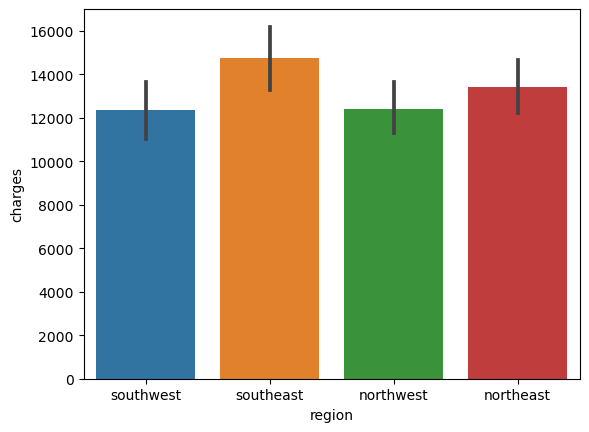

In [131]:
print(df["region"].value_counts())
sns.barplot(x="region",y="charges",data=df)


smoker
no     1064
yes     274
Name: count, dtype: int64


<Axes: xlabel='smoker', ylabel='count'>

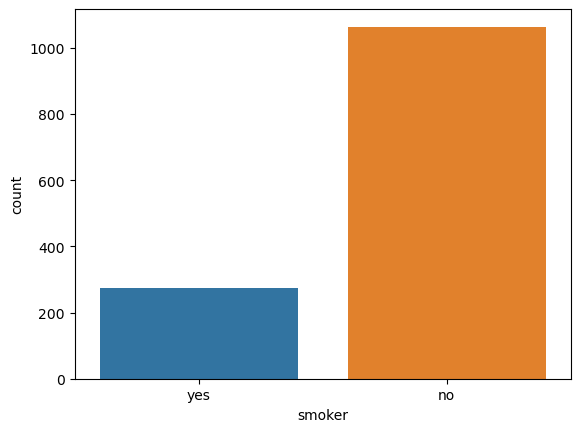

In [132]:
print(df["smoker"].value_counts())
sns.countplot(x="smoker",data=df)

In [133]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,no,northwest,10600.54830
1334,18,1,31.920,0,no,northeast,2205.98080
1335,18,1,36.850,0,no,southeast,1629.83350
1336,21,1,25.800,0,no,southwest,2007.94500


In [134]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["smoker"]=label_encoder.fit_transform(df["smoker"])
#after observing the data a small infernece:Mostly cahrges depend on age and smoker features

In [135]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df["region"]=label_encoder.fit_transform(df["region"])

In [136]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,1,10600.54830
1334,18,1,31.920,0,0,0,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


In [137]:
df["age"].max()

64

In [138]:
df["bmi"].max()

53.13

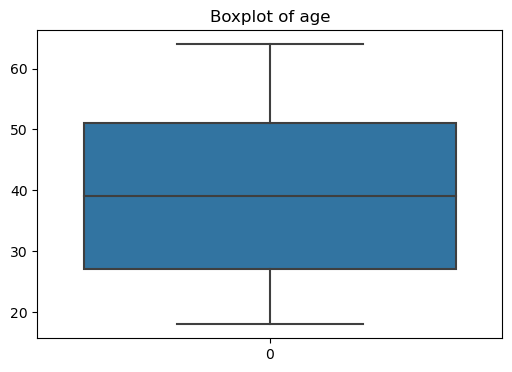

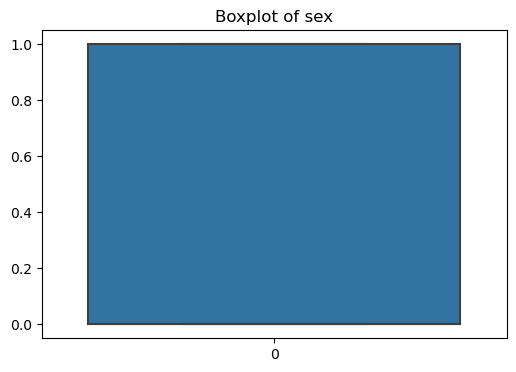

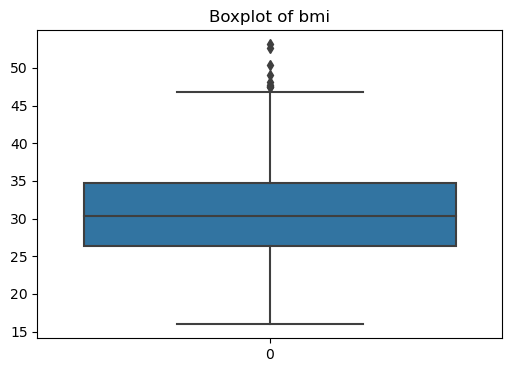

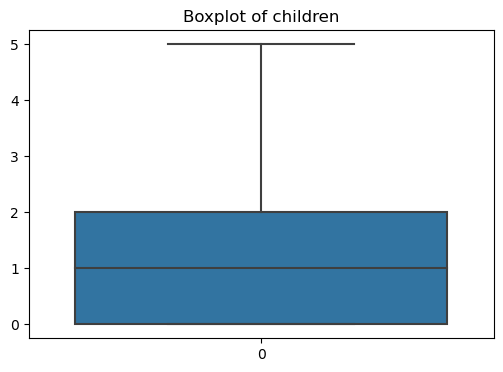

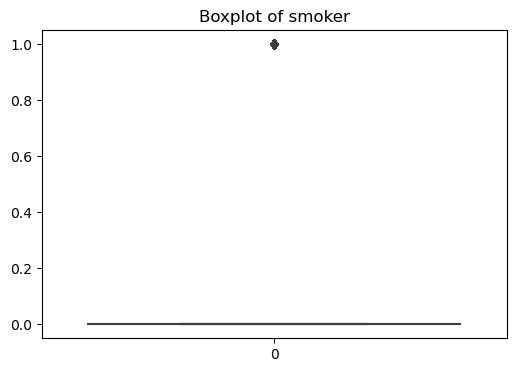

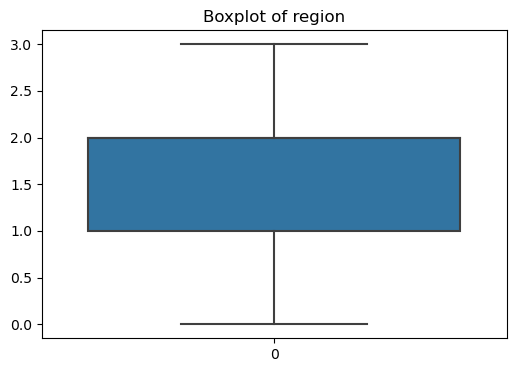

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in df.columns[:-1]:
    plt.figure(figsize=(6,4))  # Adjust the figure size as needed
    sns.boxplot(df[column])
    plt.title(f'Boxplot of {column}')

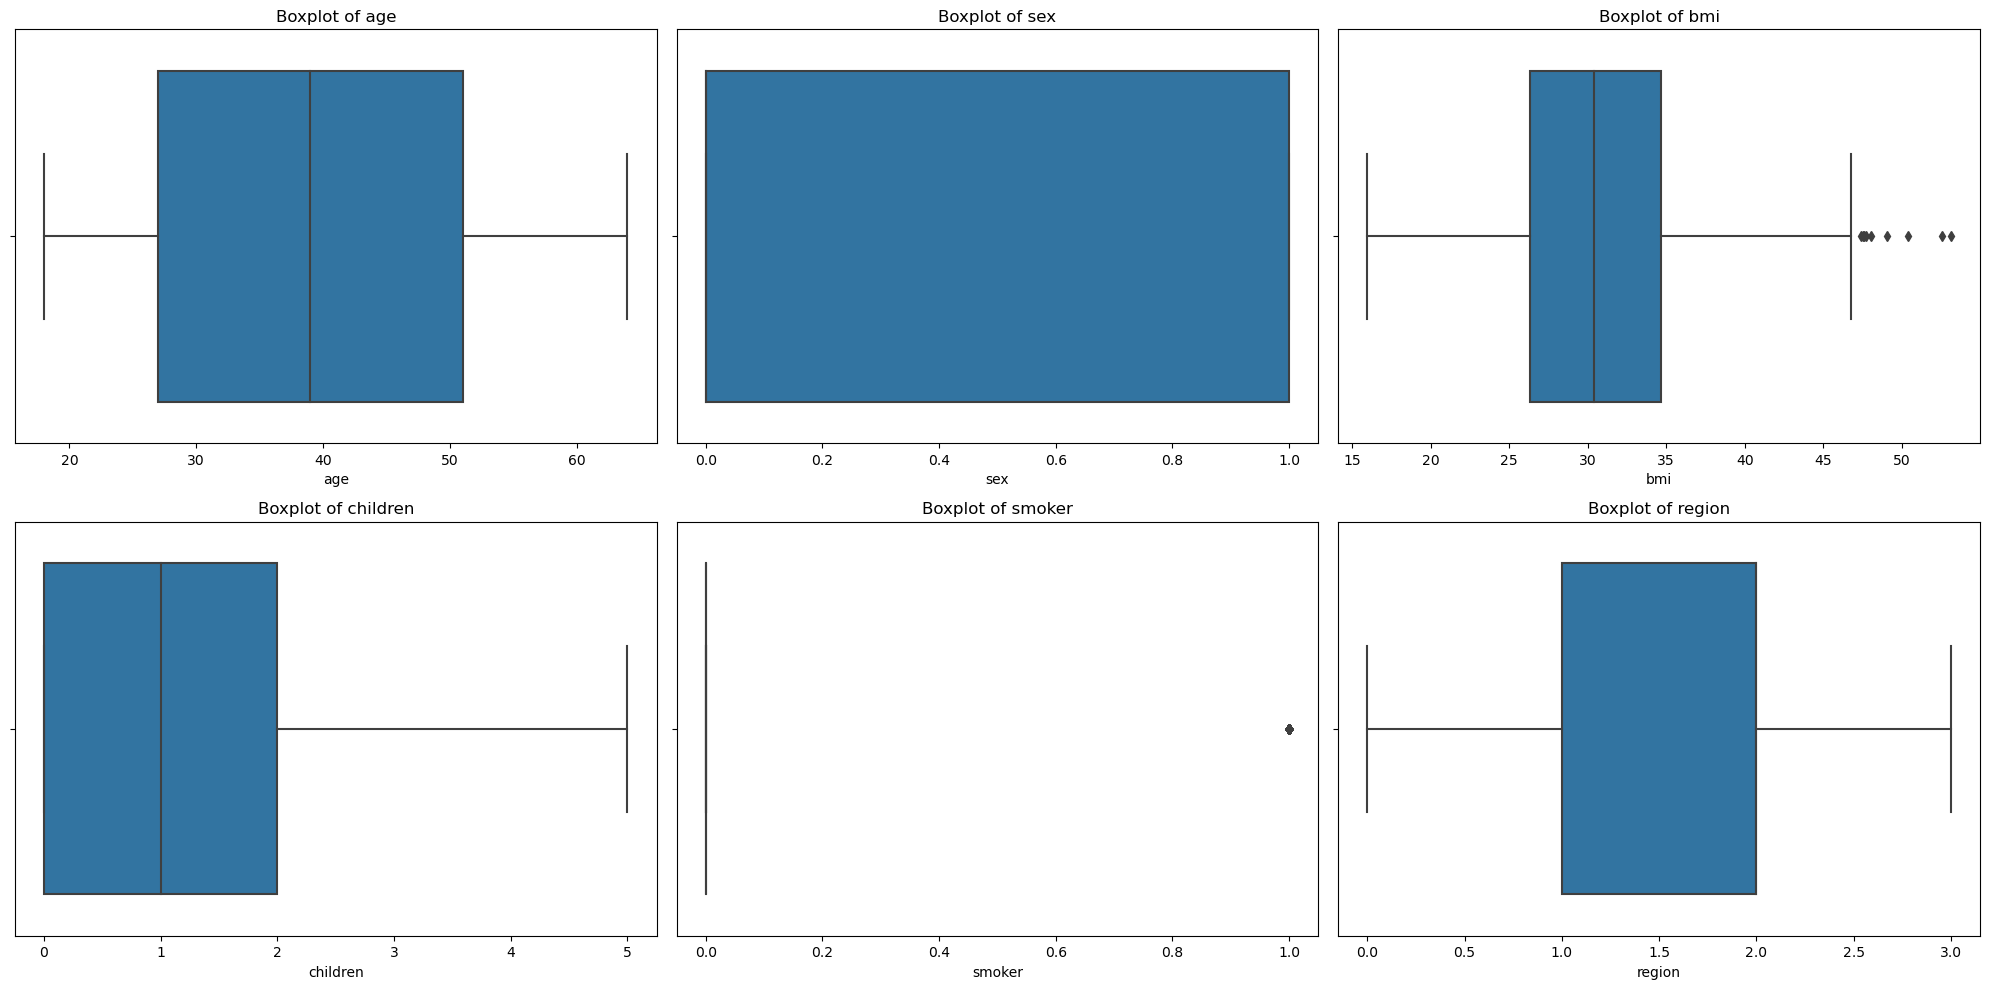

In [140]:
num_rows = 2
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))
axes = axes.flatten()
for i, column in enumerate(df.columns[:-1]):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

for j in range(len(df.columns[:-1]), num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

#by seeing below boxplot we can understand only bmi column has littel outliers

In [141]:
df[df["bmi"]>47]

,age,sex,bmi,children,smoker,region,charges
116,58,0,49.06,0,0,2,11381.32540
286,46,1,48.07,2,0,0,9432.92530
401,47,0,47.52,1,0,2,8083.91980
543,54,1,47.41,0,1,2,63770.42801
847,23,0,50.38,1,0,2,2438.05520
860,37,1,47.60,2,1,3,46113.51100
1047,22,0,52.58,1,1,2,44501.39820
1088,52,0,47.74,1,0,2,9748.91060
1317,18,0,53.13,0,0,2,1163.46270


In [142]:
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

In [143]:
df1=df.drop(columns="region")
df1

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830
1334,18,1,31.920,0,0,2205.98080
1335,18,1,36.850,0,0,1629.83350
1336,21,1,25.800,0,0,2007.94500


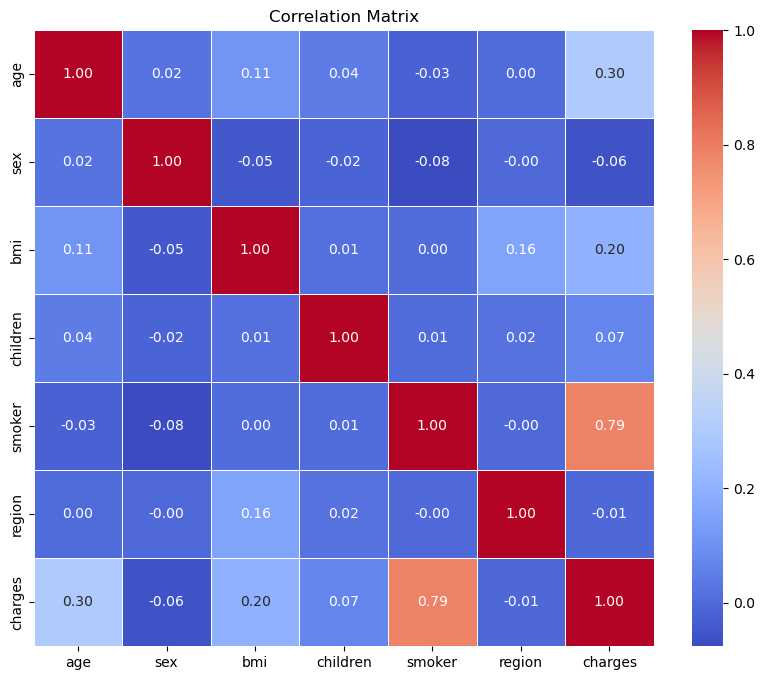

In [144]:
# Assuming df is your DataFrame
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

#Region is not have that much corrleation with charges for insurance

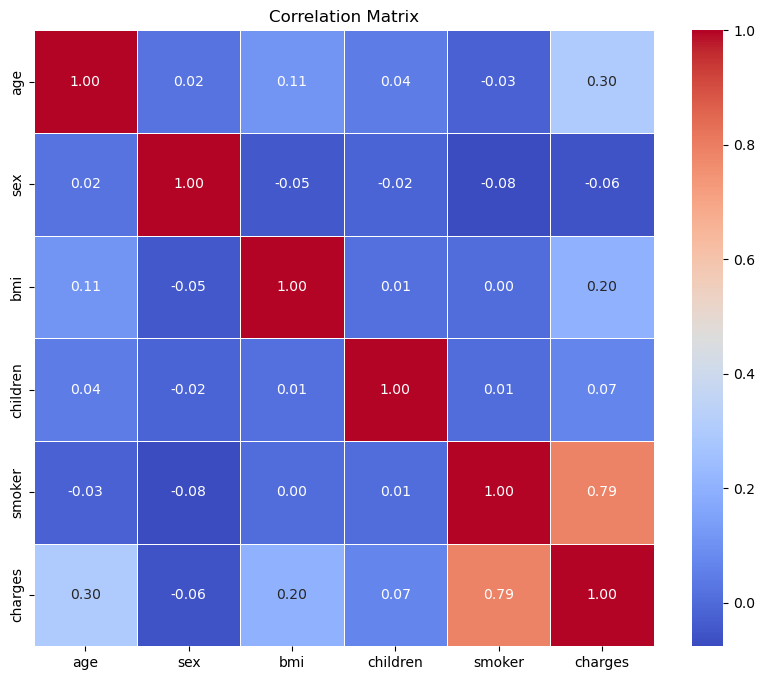

In [145]:
# Assuming df is your DataFrame
corr_matrix = df1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [146]:
##so we can conlcude from above heat map that our inference is corrcet there is more relation between charges and(smoker ,age)

In [147]:
df1

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830
1334,18,1,31.920,0,0,2205.98080
1335,18,1,36.850,0,0,1629.83350
1336,21,1,25.800,0,0,2007.94500


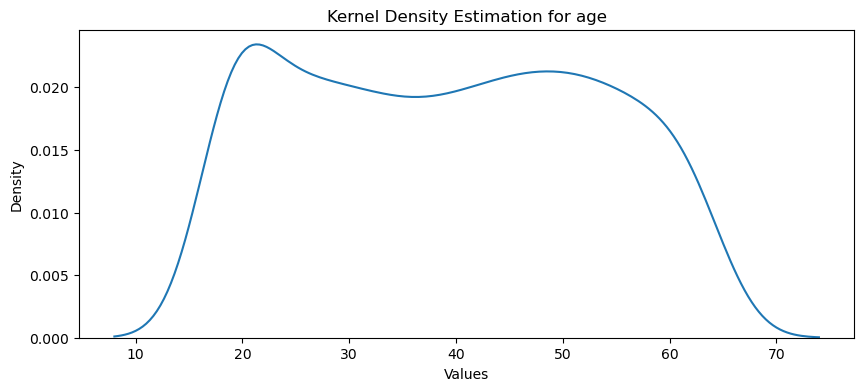

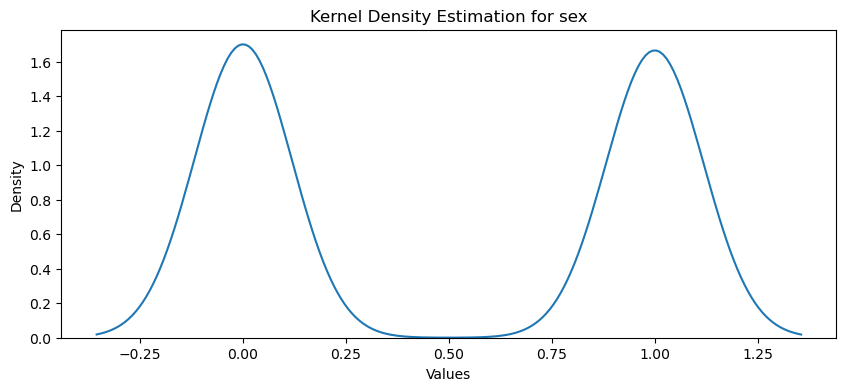

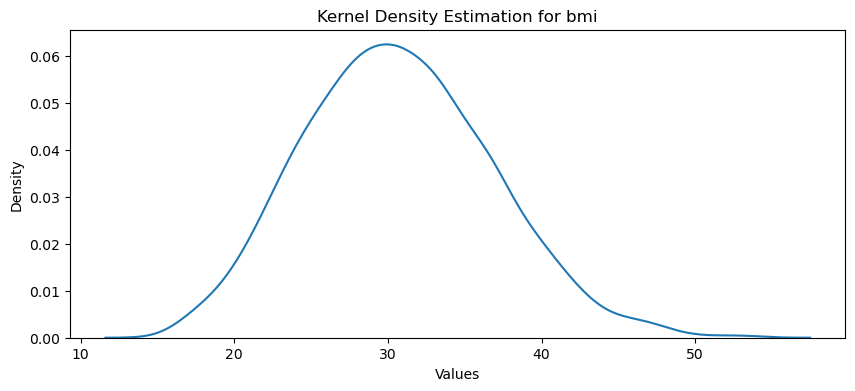

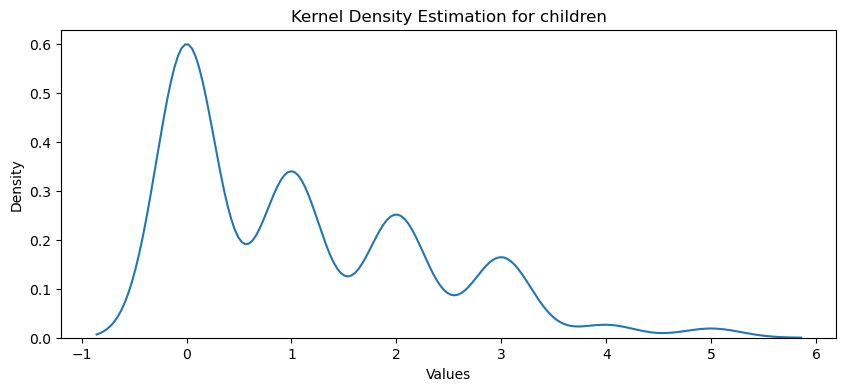

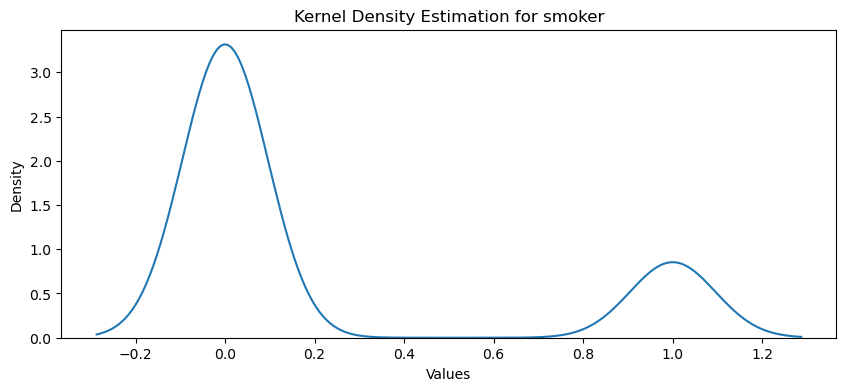

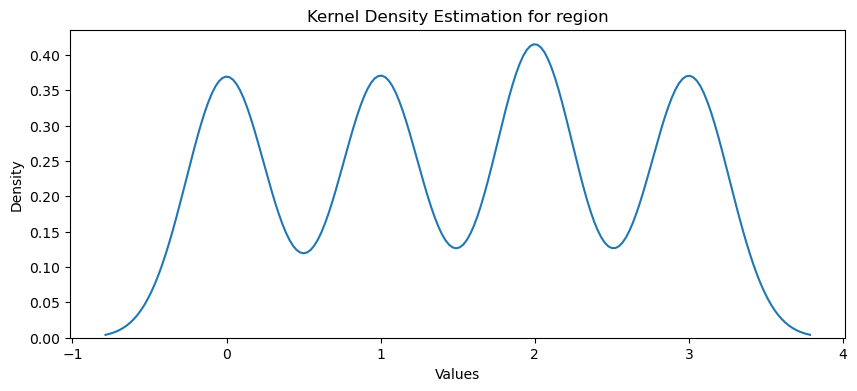

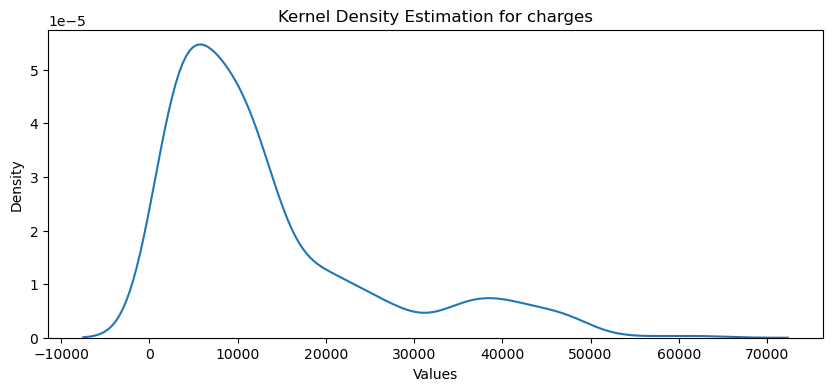

In [148]:
for column in df.columns:
    plt.figure(figsize=(10, 4))  # Create a new figure for each column
    sns.kdeplot(df[column])
    plt.title(f'Kernel Density Estimation for {column}')
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.show()


In [149]:
#outliers in bmi are imp   lets prove this training the model with and without accuracy

In [150]:
#Visualization
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,1,10600.54830
1334,18,1,31.920,0,0,0,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


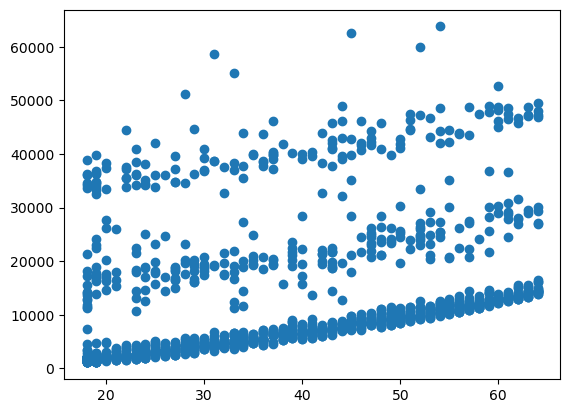

In [151]:
plt.scatter(df["age"],df["charges"]) 
#Inference from belwo scatter plot:
#more people are paying charges <10000

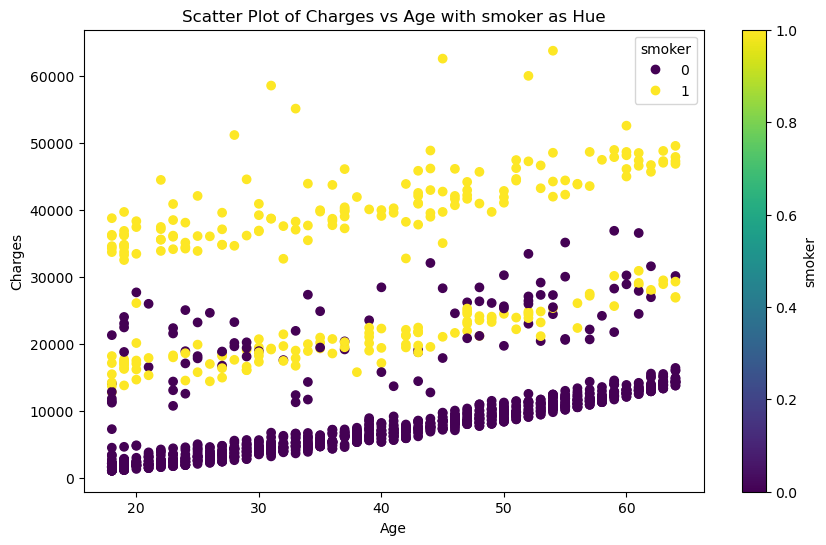

In [152]:
import matplotlib.pyplot as plt

# Plot the scatter plot
plt.figure(figsize=(10,6))
scatter = plt.scatter(df["age"], df["charges"], c=df["smoker"], label="Number of Children")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Scatter Plot of Charges vs Age with smoker as Hue")
plt.colorbar(scatter, label="smoker")
handles, labels = scatter.legend_elements(prop="colors")
legend = plt.legend(handles, labels, title="smoker", loc="upper right")

plt.show()


#Infernece from belwo scatter plot:More people who are haiving less insurance charges are non-smokers  so more effect of age and smoking in charges predcition


In [153]:
print(len(df[(df["age"] >50) & (df["smoker"] == "yes")]))
print(len(df[(df["age"] >50)]))
print(len(df[(df["age"] <50) & (df["smoker"] == "yes")]))
print(len(df[(df["age"]<50)]))

0
356
0
953


In [154]:
import plotly.express as px
px.scatter(df,x='age',y='charges',color="smoker")

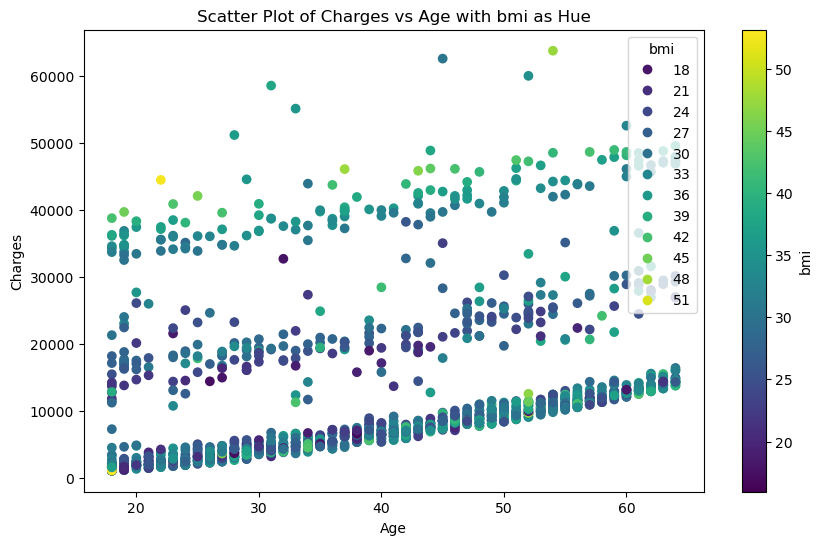

In [155]:
import matplotlib.pyplot as plt

# Plot the scatter plot
plt.figure(figsize=(10,6))
scatter = plt.scatter(df["age"], df["charges"], c=df["bmi"], label="Number of Children")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Scatter Plot of Charges vs Age with bmi as Hue")
plt.colorbar(scatter, label="bmi")
handles, labels = scatter.legend_elements(prop="colors")
legend = plt.legend(handles, labels, title="bmi", loc="upper right")

plt.show()

#infernce:bmi is not heavily impacted by dependent varaible insurance cahrges

In [156]:
##Model buliding
#In our data we have age,sex,bmi,children,smoker ,region are independent variable(6)
#charges is dependent variable

In [157]:
X=df.drop(columns="charges")
Y=df["charges"]

In [158]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,3
1,18,0,33.770,1,0,2
2,28,0,33.000,3,0,2
3,33,0,22.705,0,0,1
4,32,0,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,1
1334,18,1,31.920,0,0,0
1335,18,1,36.850,0,0,2
1336,21,1,25.800,0,0,3


In [159]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [160]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=20)

In [161]:
X_train

,age,sex,bmi,children,smoker,region
1204,18,1,27.28,3,1,2
829,39,0,21.85,1,0,1
1077,21,0,26.03,0,0,0
416,52,0,34.10,0,0,2
1295,20,0,22.00,1,0,3
...,...,...,...,...,...,...
1242,22,1,21.28,3,0,1
924,43,0,23.20,0,0,3
1247,33,0,29.40,4,0,3
271,50,0,34.20,2,1,3


In [162]:
X_test

,age,sex,bmi,children,smoker,region
698,56,0,33.725,0,0,1
520,50,1,27.360,0,0,0
1144,50,0,32.300,2,0,3
908,63,0,39.800,3,0,3
559,19,0,35.530,0,0,1
...,...,...,...,...,...,...
851,61,0,32.300,2,0,1
109,63,0,35.090,0,1,2
941,50,1,46.090,1,0,2
600,18,1,39.160,0,0,2


In [163]:
Y_train

1204    18223.4512
829      6117.4945
1077     2102.2647
416      9140.9510
1295     1964.7800
           ...    
1242     4296.2712
924      6250.4350
1247     6059.1730
271     42856.8380
474     25382.2970
Name: charges, Length: 1070, dtype: float64

In [164]:
Y_test

698     10976.24575
520     25656.57526
1144     9630.39700
908     15170.06900
559      1646.42970
           ...     
851     14119.62000
109     47055.53210
941      9549.56510
600      1633.04440
865      6600.36100
Name: charges, Length: 268, dtype: float64

In [165]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [166]:
y_pred=model.predict(X_test)

In [167]:
y_pred

array([13196.9358584 , 10037.56247782, 11693.19055205, 18033.62030664,
        4629.54200824,  2174.69963192,  2136.2366869 , 11908.14958186,
       38373.2187102 , 11295.7700803 , 16288.50190433, 28940.03202557,
        3271.37952943, 13160.35499614, 29788.41354011,  9683.23390953,
       32100.45515279, 12275.42602464,  3049.2971247 , 11122.71605301,
       38984.50466828,  8217.07650235, 11624.70707714,  2327.18516136,
       12608.54279746,  6201.97203832, 32879.84118544, 12820.13932902,
       28692.54666772, 12041.95048203, 10134.86178528,  2817.61385266,
       38391.19421273, 38619.4789662 , 14788.22862233,  7039.47872064,
        3911.24515594,   970.04163197, 31876.89956959, 25990.42824859,
       12263.57757925, 16355.92894147,  1857.14947141,  1174.59046284,
       13376.53433911,  8540.34546148, 10737.2937991 ,  5895.7301352 ,
       38156.41306051,  2378.42036946, 12187.59641569, 35658.13064222,
       10076.80369243, 11506.93865618,  7334.50136612, 27350.34741037,
      

In [168]:
Y_test

698     10976.24575
520     25656.57526
1144     9630.39700
908     15170.06900
559      1646.42970
           ...     
851     14119.62000
109     47055.53210
941      9549.56510
600      1633.04440
865      6600.36100
Name: charges, Length: 268, dtype: float64

In [169]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error( y_pred,Y_test)
mae=mean_absolute_error(y_pred,Y_test)
print(mae,mse)

4035.6014996775316 30665429.77951721


In [170]:
from sklearn.metrics import r2_score
r_squared = r2_score(Y_test, y_pred)
print("R-squared:", r_squared)
# Calculate adjusted R-squared
n = len(Y_test)  # Number of samples
p = X_test.shape[1]  # Number of predictors (features)
adj_r_squared = 1 - (1 - r_squared) * ((n - 1) / (n - p - 1))
print("Adjusted R-squared:", adj_r_squared)


#r2 score is approx is 0.8 means modle is preidcting correctly max

R-squared: 0.7960709949046045
Adjusted R-squared: 0.7913829717989633


In [171]:
##lets train our model by removing unimportant columns 
df1   #in df1 we dont have region col as corrlation with dependnet avriable is less for that
#lets consider important cols age,bmi,smoker to rpeidct cahrges varaibe


,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830
1334,18,1,31.920,0,0,2205.98080
1335,18,1,36.850,0,0,1629.83350
1336,21,1,25.800,0,0,2007.94500


In [172]:
df_refined=df1.drop(columns=["sex","children"])
df_refined

,age,bmi,smoker,charges
0,19,27.900,1,16884.92400
1,18,33.770,0,1725.55230
2,28,33.000,0,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,0,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [173]:
X=df_refined.drop(columns="charges")
Y=df1["charges"]

In [174]:
X

,age,bmi,smoker
0,19,27.900,1
1,18,33.770,0
2,28,33.000,0
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,0
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [175]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [176]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=4)

In [177]:
X_train

,age,bmi,smoker
127,52,37.400,0
578,52,30.200,0
385,19,34.400,0
1203,51,32.300,0
413,25,23.900,0
...,...,...,...
360,48,32.300,0
709,36,27.740,0
439,26,29.450,0
174,24,33.345,0


In [178]:
model=LinearRegression()

In [179]:
model.fit(X_train,Y_train)

LinearRegression()

In [180]:
y_pred=model.predict(X_test)

In [181]:
y_pred

array([ 8.18938009e+03,  1.16968932e+04,  3.88345151e+03,  1.11091632e+04,
        9.11431586e+03,  2.41499699e+03,  1.56313641e+04,  3.23424310e+04,
        3.04787266e+04,  3.34124408e+04,  4.54590478e+03,  1.03903439e+04,
        2.78836107e+04,  1.41219470e+04,  1.55107071e+04,  4.04061912e+04,
        1.16892629e+04,  5.91030158e+03,  3.78777936e+04,  3.81730430e+03,
        6.77142836e+03,  3.42824829e+04,  1.45017934e+04,  7.94869079e+03,
        6.93314561e+02,  1.50353436e+04,  1.40059663e+04,  9.34766042e+03,
        1.48907962e+04,  7.06386095e+03,  4.86356649e+03,  2.99323134e+03,
        2.76392000e+04,  3.47460993e+03,  8.85626876e+03,  2.13863715e+03,
        1.38569835e+04,  1.40668660e+04,  6.19705828e+03,  9.39983206e+03,
        1.31012977e+04,  3.61872481e+04,  7.39821110e+03,  3.76844122e+04,
        1.16515397e+04,  3.54671792e+02,  3.40213391e+04,  2.74972317e+04,
        1.36741417e+04,  1.26863519e+04,  6.18861583e+03,  4.73733177e+03,
        8.87362657e+03,  

In [182]:
len(y_pred)

268

In [183]:
mse=mean_squared_error(Y_test,y_pred)

In [184]:
mse

39226399.01324843

In [185]:
mae=mean_absolute_error(Y_test,y_pred)

In [186]:
mae

4285.7787865277905

In [187]:
from sklearn.metrics import r2_score
r2_score=r2_score(Y_test,y_pred)

In [188]:
r2_score

0.6958156274725618

In [189]:
df1

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830
1334,18,1,31.920,0,0,2205.98080
1335,18,1,36.850,0,0,1629.83350
1336,21,1,25.800,0,0,2007.94500


In [190]:
X=df1.drop(columns=["children","charges"])
Y=df1["charges"]

In [191]:
X

,age,sex,bmi,smoker
0,19,1,27.900,1
1,18,0,33.770,0
2,28,0,33.000,0
3,33,0,22.705,0
4,32,0,28.880,0
...,...,...,...,...
1333,50,0,30.970,0
1334,18,1,31.920,0
1335,18,1,36.850,0
1336,21,1,25.800,0


In [192]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [193]:

X_train, X_test, y_train, y_test = train_test_split(X,Y ,test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Coefficients and Intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 34515553.66680448
Coefficients: [ 2.59412440e+02 -9.36872692e+00  3.26437572e+02  2.36745536e+04]
Intercept: -11702.7646353601


In [194]:
from sklearn.metrics import r2_score
r2_score=r2_score(Y_test,y_pred)
r2_score

-0.8772540091072163

In [195]:
#Lets check efeficebcy with one column smoking with charges
X=df1[["smoker"]]
Y=df1["charges"]

In [196]:


X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Coefficients and Intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
from sklearn.metrics import r2_score
r2_score=r2_score(Y_test,y_pred)
r2_score


Mean Squared Error: 52745964.72752627
Coefficients: [23188.68587068]
Intercept: 8578.322547999996


-0.6846350480679317

In [197]:
#By the above r2 score dataset without children feture is performing well

In [198]:
df1

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830
1334,18,1,31.920,0,0,2205.98080
1335,18,1,36.850,0,0,1629.83350
1336,21,1,25.800,0,0,2007.94500


In [199]:
pred_val=model.predict([[1]])
pred_val

E:\anacondafolder\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([31767.00841868])

In [200]:
from sklearn.linear_model import SGDRegressor
X=df1.drop(columns=["children","charges"])
Y=df1["charges"]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

model = SGDRegressor()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Coefficients and Intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_pred)
r2_score

Mean Squared Error: 4296763848551987.5
Coefficients: [ 1558000.86305215 15572493.15806803  5017010.10256254 16109338.1476457 ]
Intercept: [-1.75943872e+08]


-27676642.842849497

In [201]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Assuming df1 is your DataFrame
X = df1.drop(columns=["children", "charges"])
Y = df1["charges"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and train the SGDRegressor model
model = SGDRegressor(random_state=42)  # Specify random_state for reproducibility
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Coefficients and Intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)


Mean Squared Error: 4.933096832502003e+21
Coefficients: [-8.06565504e+08 -1.09831046e+08 -7.72954935e+08  8.35245134e+08]
Intercept: [-1.40534842e+10]
R-squared score: -31775440514715.246


## Analysis

In [202]:
# 1)Non-smokers took more insurance policies according to above data
# 2)Non-smokers insurance charges are less compared to smokers charges
# 3)Important features affecting insurance charges are age ands smoker
# 4)region has less effected in predicting insurance charges


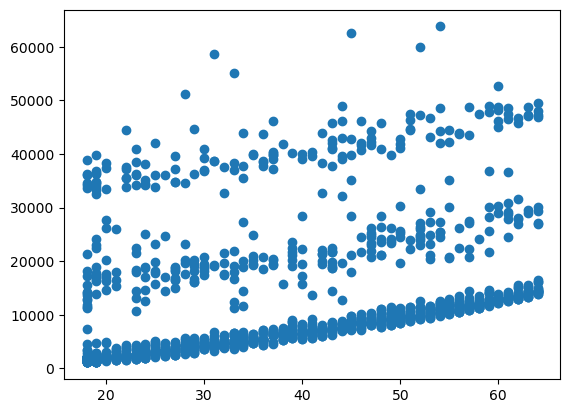

In [203]:
plt.scatter(df["age"],df["charges"])

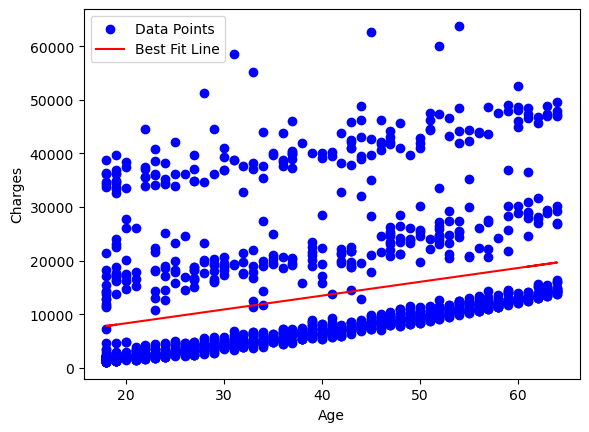

In [204]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming df is your DataFrame
X = df["age"].values.reshape(-1, 1)  # Reshape to make it 2D
y = df["charges"]

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions using the model
y_pred = model.predict(X)

# Plot the scatter plot
plt.scatter(df["age"], df["charges"], color='blue', label='Data Points')

# Plot the best-fit line
plt.plot(df["age"], y_pred, color='red', label='Best Fit Line')

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()

# Show plot
plt.show()


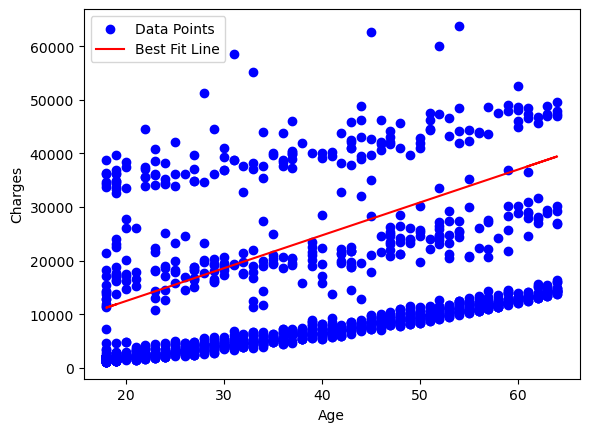

In [205]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import  SGDRegressor


# Assuming df is your DataFrame
X = df["age"].values.reshape(-1, 1)  # Reshape to make it 2D
y = df["charges"]

# Create and fit the linear regression model
model =  SGDRegressor()
model.fit(X, y)

# Make predictions using the model
y_pred = model.predict(X)

# Plot the scatter plot
plt.scatter(df["age"], df["charges"], color='blue', label='Data Points')

# Plot the best-fit line
plt.plot(df["age"], y_pred, color='red', label='Best Fit Line')

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()

# Show plot
plt.show()


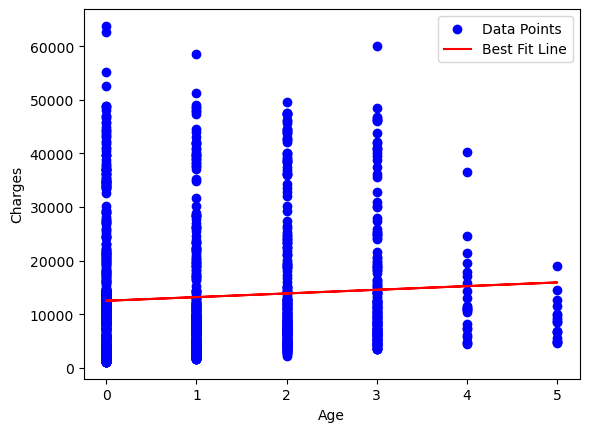

In [206]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming df is your DataFrame
X = df["children"].values.reshape(-1, 1)  # Reshape to make it 2D
y = df["charges"]

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions using the model
y_pred = model.predict(X)

# Plot the scatter plot
plt.scatter(df["children"], df["charges"], color='blue', label='Data Points')

# Plot the best-fit line
plt.plot(df["children"], y_pred, color='red', label='Best Fit Line')

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()

# Show plot
plt.show()


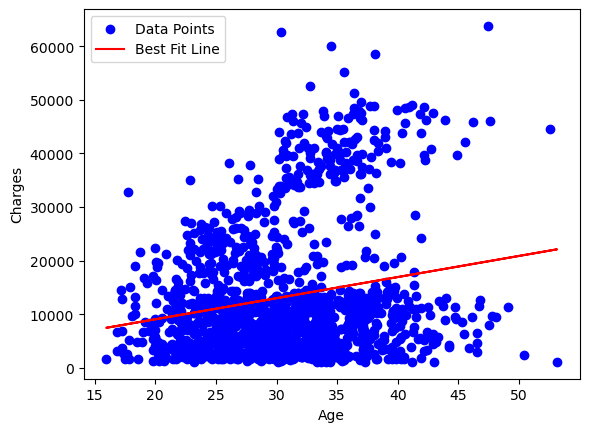

In [207]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming df is your DataFrame
X = df["bmi"].values.reshape(-1, 1)  # Reshape to make it 2D
y = df["charges"]

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions using the model
y_pred = model.predict(X)

# Plot the scatter plot
plt.scatter(df["bmi"], df["charges"], color='blue', label='Data Points')

# Plot the best-fit line
plt.plot(df["bmi"], y_pred, color='red', label='Best Fit Line')

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()

# Show plot
plt.show()


In [208]:
df1

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830
1334,18,1,31.920,0,0,2205.98080
1335,18,1,36.850,0,0,1629.83350
1336,21,1,25.800,0,0,2007.94500


In [209]:
result=df1.iloc[:100

SyntaxError: incomplete input (4173271558.py, line 1)

In [ ]:
len(random_values)

In [ ]:
sns.kdeplot(result["bmi"])

In [ ]:
x=df["age"].iloc[:1]
y=df["age"].loc[:1334]
data=np.random.normal(x,y,1000) 

In [ ]:
data

In [ ]:
df1

In [ ]:
#we have some outliers in bmi lets remove it and train the model
q1=np.quantile(df["bmi"],0.25)
q1

In [ ]:
q3=np.quantile(df["bmi"],0.75)
q3

In [ ]:
len(df[df["bmi"]>35])

In [ ]:
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr

In [ ]:
lower_bound

In [ ]:
upper_bound

In [ ]:
# Filtering rows where bmi values are either less than lower_bound or greater than upper_bound
filtered_rows = df1[(df1["bmi"]>upper_bound)]
filtered_rows

In [ ]:
df1

In [ ]:
result = df1[(df1["bmi"]>lower_bound) & (df1["bmi"]<upper_bound)]
result

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Assuming df1 is your DataFrame
X = result.drop(columns=["charges"])
Y = result["charges"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and train the SGDRegressor model
model = LinearRegression()  # Specify random_state for reproducibility
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Coefficients and Intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)


In [ ]:

# Assuming lower_bound and upper_bound are defined

# Cap outliers to upper and lower bounds
df1["bmi"] = df1["bmi"].clip(lower=lower_bound, upper=upper_bound)


In [ ]:
df1

In [210]:
model.predict([[70,1,45,0,0]])

ValueError: X has 5 features, but LinearRegression is expecting 1 features as input.

In [211]:
#SGD regressor  uses gradient descent method to minize the cost function

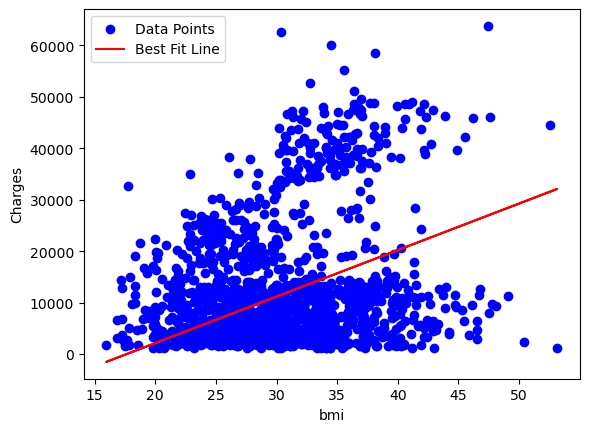

In [212]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import  SGDRegressor

X = df[["bmi"]]
y = df["charges"]

# Create and fit the linear regression model
model =  SGDRegressor()
model.fit(X, y)

# Make predictions using the model
y_pred = model.predict(X)

# Plot the scatter plot
plt.scatter(df["bmi"], df["charges"], color='blue', label='Data Points')

# Plot the best-fit line
plt.plot(df["bmi"], y_pred, color='red', label='Best Fit Line')

# Add labels and legend
plt.xlabel('bmi')
plt.ylabel('Charges')
plt.legend()

# Show plot
plt.show()


In [213]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Assuming df1 is your DataFrame
X = df1.drop(columns=["charges"])
Y = df1["charges"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and train the SGDRegressor model
model =  SGDRegressor()  # Specify random_state for reproducibility
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Coefficients and Intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)
df1


Mean Squared Error: 3.14960976537104e+19
Coefficients: [-1.12151763e+08  2.43313810e+08 -4.02505587e+08 -8.61838873e+08
 -5.35171760e+09]
Intercept: [1.4804069e+10]
R-squared score: -202875072478.2837


,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830
1334,18,1,31.920,0,0,2205.98080
1335,18,1,36.850,0,0,1629.83350
1336,21,1,25.800,0,0,2007.94500


In [214]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Assuming df1 is your DataFrame
X = df1.drop(columns=["charges"])
Y = df1["charges"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and train the SGDRegressor model
model =  SGDRegressor(max_iter=100, random_state=42)  # Example hyperparameters
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Coefficients and Intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)


Mean Squared Error: 1.2554658597376533e+17
Coefficients: [-2377995.73377002 48086363.77375121 16320487.6646224  18500301.93294804
 60899450.16260958]
Intercept: [-8.08847129e+08]
R-squared score: -808680268.1873714


E:\anacondafolder\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



In [267]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

X = df1.drop(columns=["charges"])
Y = df1["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
print(X)
print(X_train_scaled)

model =  SGDRegressor(max_iter=1000,random_state=5)  # Example hyperparameters
model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Coefficients and Intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)


      age  sex     bmi  children  smoker
0      19    1  27.900         0       1
1      18    0  33.770         1       0
2      28    0  33.000         3       0
3      33    0  22.705         0       0
4      32    0  28.880         0       0
...   ...  ...     ...       ...     ...
1333   50    0  30.970         3       0
1334   18    1  31.920         0       0
1335   18    1  36.850         0       0
1336   21    1  25.800         0       0
1337   61    1  29.070         0       1

[1338 rows x 5 columns]
[[ 0.47222651  1.0246016  -1.75652513  0.73433626 -0.50874702]
 [ 0.54331294  1.0246016  -1.03308239 -0.91119211 -0.50874702]
 [ 0.8987451   1.0246016  -0.94368672 -0.91119211 -0.50874702]
 ...
 [ 1.3252637  -0.97598911 -0.89153925 -0.91119211 -0.50874702]
 [-0.16755139  1.0246016   2.82086429  0.73433626  1.96561348]
 [ 1.1120044  -0.97598911 -0.10932713 -0.91119211 -0.50874702]]
Mean Squared Error: 34004979.77344187
Coefficients: [3605.78900343    9.93665515 1960.10441129  516

In [281]:
model.predict([[10,1,34,1,1]])

array([126185.41485798])

In [296]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

X = df1.drop(columns=["charges"])
Y = df1["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression() 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)


Mean Squared Error: 33979257.05080822
Coefficients: [2.57068962e+02 7.95178837e+00 3.27533514e+02 4.27254431e+02
 2.36539033e+04]
Intercept: -12121.403039282899
R-squared score: 0.7811302113434095


In [283]:
model.predict([[10,1,34,1,1]])

E:\anacondafolder\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([25674.53557734])

In [ ]:
OLs from statsmodels

In [288]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

X = df1.drop(columns=["charges"])
Y = df1["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train = sm.add_constant(X_train)

model = sm.OLS(y_train,X_train) 
results=model.fit()
X_test = sm.add_constant(X_test)


y_pred = results.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)
df1


Mean Squared Error: 33979257.05080821
R-squared score: 0.7811302113434095


,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830
1334,18,1,31.920,0,0,2205.98080
1335,18,1,36.850,0,0,1629.83350
1336,21,1,25.800,0,0,2007.94500


In [298]:
#Polynomial regression

In [394]:
x=[]
for i in range(-30,30):
    x.append([i])
x

[[-30],
 [-29],
 [-28],
 [-27],
 [-26],
 [-25],
 [-24],
 [-23],
 [-22],
 [-21],
 [-20],
 [-19],
 [-18],
 [-17],
 [-16],
 [-15],
 [-14],
 [-13],
 [-12],
 [-11],
 [-10],
 [-9],
 [-8],
 [-7],
 [-6],
 [-5],
 [-4],
 [-3],
 [-2],
 [-1],
 [0],
 [1],
 [2],
 [3],
 [4],
 [5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [13],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19],
 [20],
 [21],
 [22],
 [23],
 [24],
 [25],
 [26],
 [27],
 [28],
 [29]]

In [395]:
y=[]
for i in range(-30,30):
    y.append([i*i])
    
y

[[900],
 [841],
 [784],
 [729],
 [676],
 [625],
 [576],
 [529],
 [484],
 [441],
 [400],
 [361],
 [324],
 [289],
 [256],
 [225],
 [196],
 [169],
 [144],
 [121],
 [100],
 [81],
 [64],
 [49],
 [36],
 [25],
 [16],
 [9],
 [4],
 [1],
 [0],
 [1],
 [4],
 [9],
 [16],
 [25],
 [36],
 [49],
 [64],
 [81],
 [100],
 [121],
 [144],
 [169],
 [196],
 [225],
 [256],
 [289],
 [324],
 [361],
 [400],
 [441],
 [484],
 [529],
 [576],
 [625],
 [676],
 [729],
 [784],
 [841]]

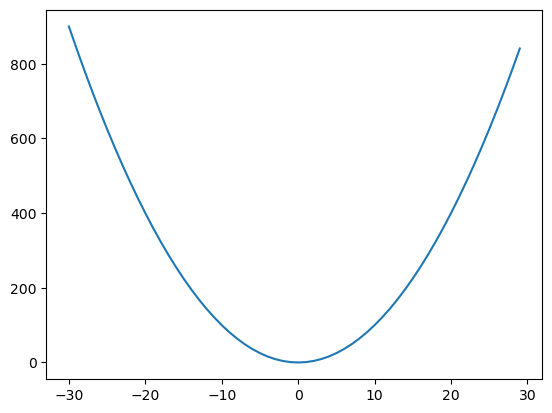

In [396]:
plt.plot(x,y)

In [397]:
#Lets do linear regression 

In [398]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

model = LinearRegression() 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)


Mean Squared Error: 78886.6661625709
Coefficients: [[-0.72173913]]
Intercept: [276.4]
R-squared score: -0.18404162184191075


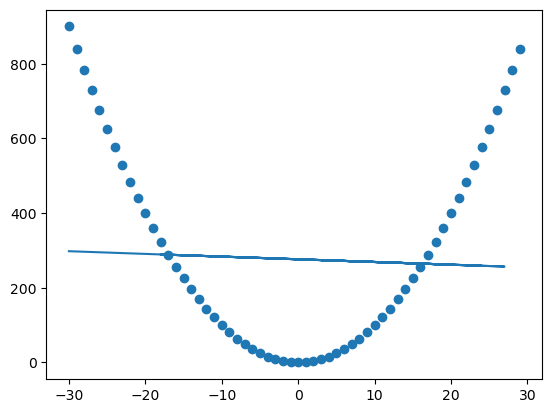

In [399]:
plt.scatter(x,y)
plt.plot(X_test, y_pred)

In [400]:
#here data is not linear so line is not correct fit,here comes polynomial regression incresing degree

In [403]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Assuming x and y are defined somewhere before this code snippet

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

poly_reg = PolynomialFeatures(degree=2)
X_poly_train = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.transform(X_test)

# Fitting the polynomial regression model
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_poly_test)

# Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculating R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)


Mean Squared Error: 1.0046932488894806e-26
R-squared score: 1.0


In [390]:
x=poly_reg.fit_transform([[20]])

model.predict(x)

array([[400.]])

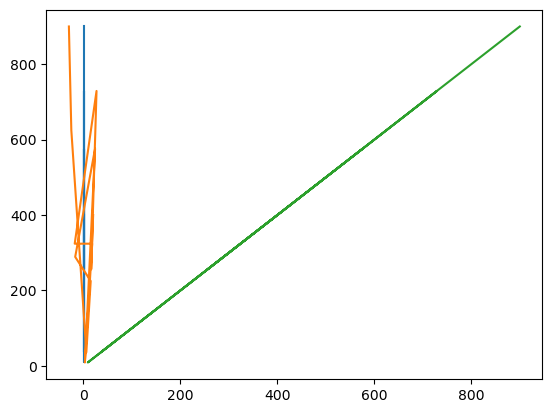

In [391]:

plt.plot(X_poly_test, y_pred)